In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor


2023-03-18 17:57:17.416180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 17:57:17.589873: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-18 17:57:17.589893: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-18 17:57:18.361110: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
dense_config = dict(
    use_bias = True,
    kernel_initializer = "glorot_normal",
    bias_initializer = "glorot_normal",
    activation = "tanh",
)

In [3]:
x = np.linspace(-10,10,500)

In [4]:
def make_model():
    inputs = tf.keras.Input(shape=(1,))

    hidden_layers = [
        tf.keras.layers.Dense(2000, **dense_config),
    ]

    output_layer = tf.keras.layers.Dense(1, **dense_config)

    layer_output = hidden_layers[0](inputs)
    for layer in hidden_layers[1:]:
        layer_output = layer(layer_output)
    outputs = output_layer(layer_output)

    return tf.keras.Model(inputs,outputs)


16/16 [==============================] - 0s 1ms/step


2023-03-18 17:57:19.981473: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-18 17:57:19.981507: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-18 17:57:19.981538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (roy-XPS-13-7390): /proc/driver/nvidia/version does not exist
2023-03-18 17:57:19.981834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


16/16 [==============================] - 0s 2ms/step


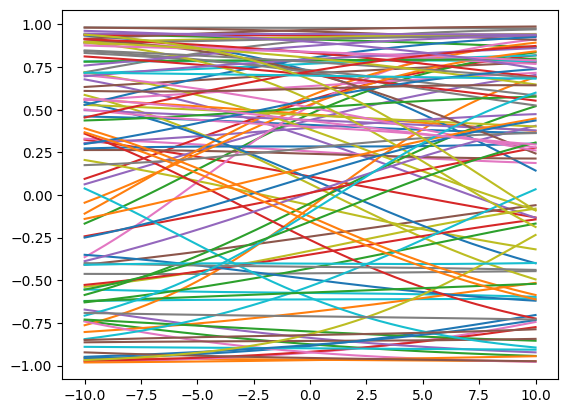

In [5]:
for i in range(100):
    model = make_model()
    model.compile(loss="mse")
    y = model.predict(x)
    plt.plot(x,y)

In [35]:
x_train = np.array([0.1,5])
y_train = np.array([0.2,-0.3])
for i in range(100):
    model = make_model()
    model.compile(loss="mse",optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
    model.fit(x_train,y_train,epochs=50)
    y = model.predict(x)
    plt.plot(x,y)
plt.plot(x_train,y_train,'.r',lw=2)

Epoch 1/50
1/1 [==============================] - 0s 430ms/step - loss: 0.4014
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3481
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3194
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2641
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2302
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2006
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1615
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1209
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0699
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0241
Epoch 13/50
1/1 [==============================] - 0s 7ms/step - loss: 

In [33]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 100))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train.reshape(-1, 1), y_train)
gaussian_process.kernel_

/home/roy/github/RoyStegeman/dl_theory/venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


0.744**2 * RBF(length_scale=10)

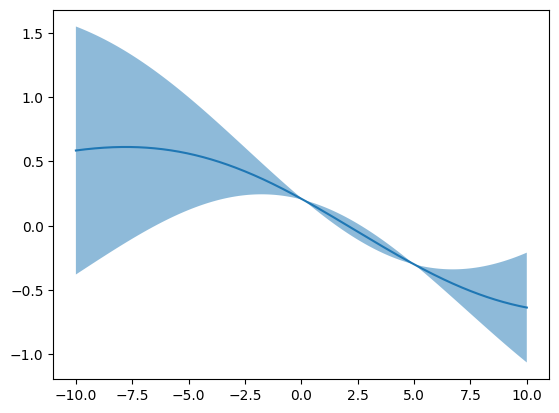

In [34]:
mean_prediction, std_prediction = gaussian_process.predict(x.reshape(-1, 1), return_std=True)
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.plot(x_train,y_train,'.r',lw=2)